In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.4 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=555befcbc14ad0f14233b495c28208539c4ae4d90a98bde799ff9e211617a18e
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod


In [3]:
from pyod.utils.data import generate_data

In [6]:
#gerar dados aleatórios com 2 eixos
Dados_X, Dados_Y = generate_data( n_train= 1000, train_only = True, n_features = 2)

#separar os valores em dois eixos e ajustar o eixo
Eixo_X = Dados_X[:, [0]].reshape(-1, 1)
Eixo_Y = Dados_X[:, [1]].reshape(-1, 1)

#criar uma tabela
Tabela = pd.DataFrame( Eixo_X, columns=['Eixo X'])
Tabela['Eixo Y'] = Eixo_Y
Tabela['Classe'] = Dados_Y

#verificando as 5 primeiras
Tabela.head()

,Eixo X,Eixo Y,Classe
0,1.968228,1.662851,0.0
1,2.017637,2.211355,0.0
2,1.796026,1.983461,0.0
3,2.307020,1.737325,0.0
4,2.169710,2.044666,0.0


In [7]:
#Divisao
Tabela.Classe.value_counts( normalize=True) * 100

0.0    90.0
1.0    10.0
Name: Classe, dtype: float64

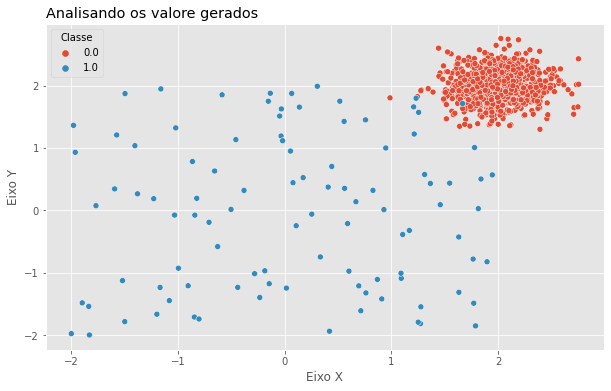

In [11]:
#gráfico
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))

plt.title('Analisando os valore gerados', loc='left')

sns.scatterplot(data=Tabela, x='Eixo X', y='Eixo Y', hue='Classe')

In [12]:
#estatisticas
Tabela.describe()

,Eixo X,Eixo Y,Classe
count,1000.000000,1000.000000,1000.00000
mean,1.811652,1.798025,0.10000
std,0.712689,0.751730,0.30015
min,-1.999090,-1.999750,0.00000
25%,1.780656,1.791316,0.00000
50%,1.973207,1.960099,0.00000
75%,2.140736,2.149496,0.00000
max,2.755129,2.755678,1.00000


In [14]:
Tabela.describe().transpose()
#transpose inverte as linhas e colunas

,count,mean,std,min,25%,50%,75%,max
Eixo X,1000.0,1.811652,0.712689,-1.99909,1.780656,1.973207,2.140736,2.755129
Eixo Y,1000.0,1.798025,0.751730,-1.99975,1.791316,1.960099,2.149496,2.755678
Classe,1000.0,0.100000,0.300150,0.00000,0.000000,0.000000,0.000000,1.000000


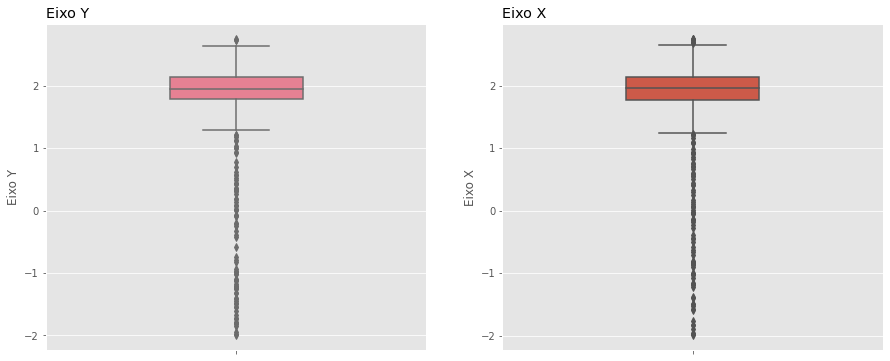

In [19]:
plt.figure(figsize=(15,6))

#grid1
plt.subplot(1, 2, 1)
plt.title('Eixo Y', loc='left')
sns.boxplot(data=Tabela, y='Eixo Y', width=0.35, palette='husl')
#grid2
plt.subplot(1,2,2)
plt.title('Eixo X', loc='left')
sns.boxplot(data=Tabela, y = 'Eixo X', width=0.35)

In [30]:
#fazer os cálculos para extrair os outliers
#calcular o primeiro quartil
Q1 = np.percentile(Tabela['Eixo X'], 25, interpolation='midpoint')

#terceiro quartil
Q3 = np.percentile(Tabela['Eixo X'], 75, interpolation='midpoint')

#INTERVALO DE QUARTIL
IQR = Q3 - Q1


print(f'primeiro quartil{Q1}')
print(f'terceiro quartil {Q3}')
print(f'{IQR}')

primeiro quartil1.780483633871763
terceiro quartil 2.140773526539731
0.3602898926679683


In [31]:
Superior = Tabela['Eixo X'] >= (Q3 + 1.5 * IQR)
Inferior = Tabela['Eixo X'] <= (Q3 - 1.5 * IQR)

print('Valores (Index) que são Outliers')
print(np.where(Superior))
print(np.where(Inferior))

Valores (Index) que são Outliers
(array([ 70,  83, 142, 214, 385, 563, 753]),)
(array([  6,   7,   8,  33,  36,  44,  52,  61,  86, 132, 253, 256, 269,
       270, 273, 286, 297, 312, 332, 349, 360, 396, 457, 466, 500, 513,
       521, 588, 607, 611, 617, 640, 655, 669, 692, 730, 751, 806, 810,
       825, 884, 898, 900, 901, 903, 904, 905, 906, 907, 908, 909, 910,
       911, 912, 915, 916, 917, 918, 919, 920, 921, 923, 924, 925, 926,
       927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 941,
       942, 943, 944, 945, 946, 947, 948, 949, 950, 953, 954, 955, 956,
       957, 958, 960, 961, 963, 964, 965, 966, 967, 968, 969, 970, 971,
       972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984,
       985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998,
       999]),)


In [41]:
#formulas
MAIOR = Q3 + 1.5 * IQR
MENOR = Q1 - 1.5 * IQR

MAIOR, MENOR


(2.681208365541684, 1.2400487948698105)

In [38]:
#identificando os registros
Dado_Superior = np.where(Tabela['Eixo X'] >= MAIOR)
Dado_Inferior = np.where(Tabela['Eixo X'] <= MENOR)

print(f'{Dado_Superior[0].shape}')
print(f'{Dado_Inferior[0].shape}')

(7,)
(82,)


In [42]:
#criando uma nova base sem os outliers
Nova_base = Tabela.drop( Dado_Superior[0])
Nova_base = Tabela.drop( Dado_Inferior[0])

In [46]:
print(f'Antes a base de dados tinha {Tabela.shape[0]}')
print(f'Agora temos {Nova_base.shape[0]}')
print(f'Assim, foram subtraidos {Tabela.shape[0] - Nova_base.shape[0]}')

Antes a base de dados tinha 1000
Agora temos 918
Assim, foram subtraidos 82


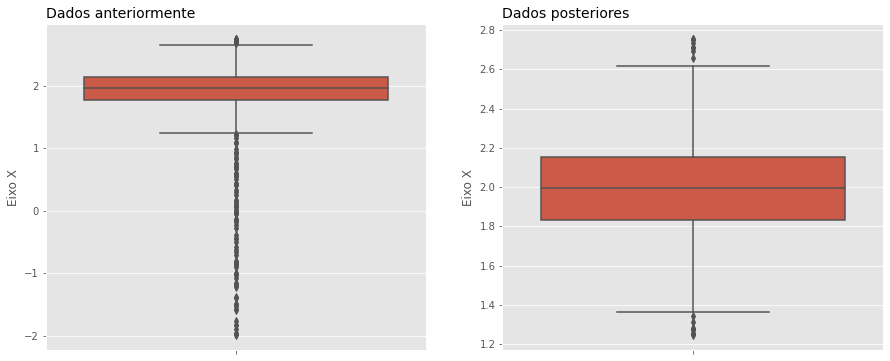

In [51]:
#tamanho
plt.figure(figsize=(15,6))

#grid 1
plt.subplot(1,2,1)
plt.title('Dados anteriormente', fontsize=14, loc='left')
sns.boxplot(data=Tabela, y='Eixo X')

#grid 2
plt.subplot(1, 2, 2)
plt.title('Dados posteriores', fontsize=14, loc='left')
sns.boxplot(data=Nova_base, y='Eixo X')